<a href="https://colab.research.google.com/github/donaldocelaj/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

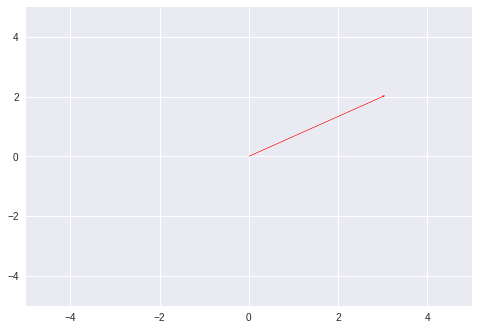

In [2]:
plt.arrow(0,0, 3, 2,head_width=.05, head_length=0.05, color ='red')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
b = math.sqrt(17**2 + 4**2 + 2**2 +1)
b

17.60681686165901

The norm is the length of the vector.

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [4]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

print(c)
print(d)

[ 3  7 -2 12]
[ 9 -7  4  6]


In [5]:
np.dot(c, d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [6]:
e = np.array([[7, 4, 2], [1, 3, -1], [2, 6, -4]])
e

array([[ 7,  4,  2],
       [ 1,  3, -1],
       [ 2,  6, -4]])

In [7]:
e = np.mat('7 4 2; 1 3 -1; 2 6 -4')
print(e)

[[ 7  4  2]
 [ 1  3 -1]
 [ 2  6 -4]]


In [8]:
print('Inverse= \n', e.I)

Inverse= 
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


In [9]:
print("transpose, \n", e.T)

transpose, 
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [10]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [11]:
customers_mean = df.customers.mean()
print('customers mean: ', customers_mean)

snow_mean = df.snow.mean()
print('snow mean: ', snow_mean)

customers mean:  1135.7142857142858
snow mean:  2.7142857142857144


In [12]:
df['customer_squared'] = (df.customers-customers_mean)**2
df['snow_squared'] = (df.snow-snow_mean)**2
df.head(10)

,customers,snow,customer_squared,snow_squared
0,820,0,99675.510204,7.367347
1,760,1,141161.224490,2.938776
2,1250,7,13061.224490,18.367347
3,990,1,21232.653061,2.938776
4,1080,0,3104.081633,7.367347
5,1450,6,98775.510204,10.795918
6,1600,4,215561.224490,1.653061


In [13]:
df.columns

Index(['customers', 'snow', 'customer_squared', 'snow_squared'], dtype='object')

In [0]:
variance_customers = df['customer_squared'].sum()/len(df)
variance_snow = df['snow_squared'].sum()/len(df)

In [15]:
print('variance customers: ', variance_customers)
print('variance_snow: ', variance_snow)

variance customers:  84653.06122448981
variance_snow:  7.346938775510203


In [16]:
print('standard deviation: \n', df.iloc[:,:2].describe().std())

standard deviation: 
 customers    526.488848
snow           2.797023
dtype: float64


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No, because they are based on different means 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [17]:
df.iloc[:,:2].cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [18]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [0]:
df_A = df.drop('Country', axis=1)

In [20]:
df_A

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [21]:
df.isnull().sum()

Alcoholic Drinks      0
Beverages             0
Carcass_Meat          0
Cereals               0
Cheese                0
Confectionery         0
Country               0
Fats_and_Oils         0
Fish                  0
Fresh_Fruit           0
Fresh_Potatoes        0
Fresh_Veg             0
Other_Meat            0
Other_Veg             0
Processed_Potatoes    0
Processed_Veg         0
Soft_Drinks           0
Sugars                0
dtype: int64

In [0]:
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn import preprocessing
from scipy.spatial.distance import cdist

In [23]:
scaled = preprocessing.scale(df_A)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [24]:
scaled.mean(axis=0)

array([ 0.00000000e+00, -5.55111512e-17,  0.00000000e+00,  6.93889390e-18,
        0.00000000e+00,  5.55111512e-17,  6.93889390e-18,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.55111512e-17,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -5.55111512e-17, -2.77555756e-17,
       -5.55111512e-17])

In [26]:
scaler = preprocessing.StandardScaler().fit(df_A)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [27]:
df_B = scaler.transform(df_A)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [33]:
df_scaled = pd.DataFrame(df_B)
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.104998,-0.051917,-0.017495,-0.644322,0.658275,-0.138303,-0.632429,0.644585,0.737407,-0.450076,0.863312,-0.259546,0.377736,-0.336265,0.805477,-0.435231,0.130551
1,0.841823,1.609440,-1.277169,1.679463,0.535805,0.968122,1.535899,1.152440,0.929297,0.435696,1.093528,1.198856,1.401682,0.084066,1.171603,-1.404236,1.547958
2,0.716563,-0.467257,-0.227441,-0.855575,0.535805,0.746837,-1.097071,-0.332059,-0.057567,-1.335847,-0.709834,0.543811,-0.496364,1.513193,-0.878702,1.190727,-0.540853
3,-1.663384,-1.090266,1.522105,-0.179565,-1.729885,-1.576656,0.193601,-1.464967,-1.609137,1.350227,-1.247006,-1.483121,-1.283054,-1.260994,-1.098378,0.648741,-1.137656


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
pca = PCA(2)

In [36]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca_df = pd.DataFrame(pca.transform(scaled))

In [43]:
pca_df

,0,1
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


''

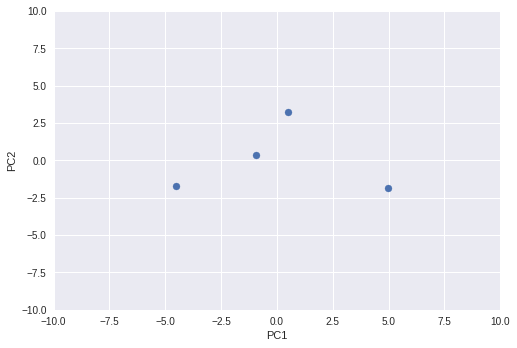

In [45]:
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(pca_df[0], pca_df[1])
plt.xlabel('PC1')
plt.ylabel('PC2')
;

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [30]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [48]:
points.shape

(200, 2)

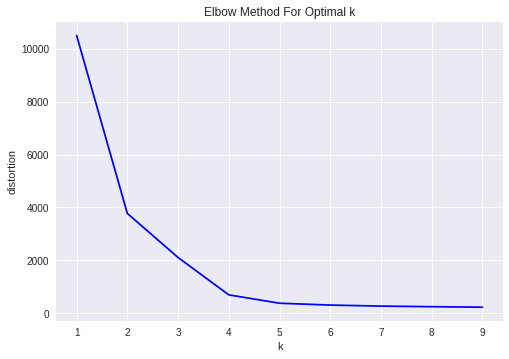

In [75]:
distortion = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    distortion.append(km.inertia_)

plt.plot(K, distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

In [66]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4)

kmeans.fit(points)
labels = kmeans.labels_

print(labels)

[3 1 1 3 1 1 3 3 0 1 1 1 1 1 3 1 3 1 1 2 3 2 2 2 1 1 1 0 1 1 1 1 1 2 1 1 1
 1 0 1 1 2 0 0 0 1 1 1 3 1 2 3 3 0 2 1 1 0 0 3 2 1 3 0 2 0 2 0 3 0 1 1 1 1
 2 2 1 1 0 2 0 1 1 1 0 1 0 1 1 2 0 1 2 1 1 1 1 1 1 1 1 1 3 1 1 2 3 3 3 2 1
 2 1 3 1 1 0 0 2 0 2 1 1 3 1 3 1 2 0 3 1 3 1 3 0 0 1 2 3 1 0 1 1 2 1 0 1 0
 3 1 1 1 3 2 1 0 1 2 1 3 1 1 0 3 2 2 1 0 1 1 3 1 0 2 1 1 1 1 1 3 1 1 1 1 1
 1 3 2 0 1 1 3 2 3 1 0 2 2 1 1]


In [0]:
points['clusters'] = pd.Series(labels).values

In [0]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

In [0]:
centroids = get_centroids(points, 'clusters')

In [70]:
centroids

,x,y
clusters,,
0,-3.597407,4.133441
1,-2.733593,-8.204353
2,6.249793,3.844572
3,-8.366530,-3.612381


In [0]:
def plot_clusters(df, column_header, centroids):
  color = {0:'yellow', 1:'green', 2:'blue', 3:'red'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=color[key])
  plt.show()
  

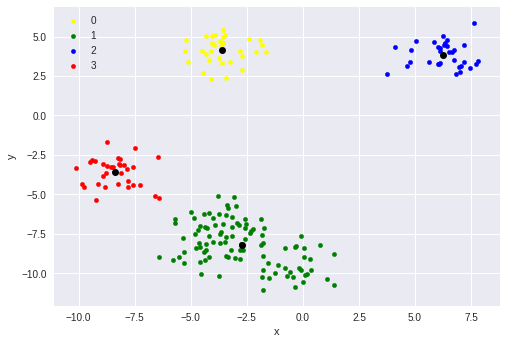

In [72]:
plot_clusters(points, 'clusters', centroids)